Will Geary

(wcg2111)

# Question 1
*(20 points) Run the Ford-Fulkerson algorithm on the following network, with edge capacities as shown, to compute the max s-t flow. At every step, draw the residual graph and the augmenting paths. Report the maximum flow along with a minimum cut.*

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from graphviz import Source # graphviz is a library for vizualizing graphs / networks

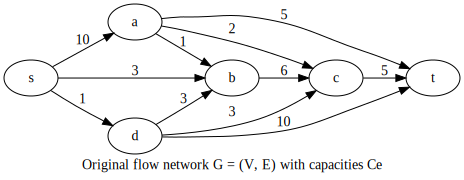

In [3]:
src = Source('''
digraph {

rankdir=LR;
label = "Original flow network G = (V, E) with capacities Ce";
rank=same;
constraint=true;

s->a[label=10]
s->d[label=1]
s->b[label=3]

a->b[label=1]
a->c[label=2]
d->b[label=3]
b->c[label=6]
d->c[label=3]
a->t[label=5]
c->t[label=5]
d->t[label="10"]
       }
}
''')

src

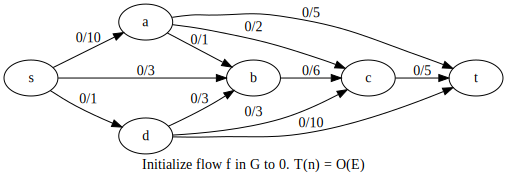

In [4]:
src = Source('''
digraph {

rankdir=LR;
label = "Initialize flow f in G to 0. T(n) = O(E)";
rank=same;
constraint=true;

s->a[label="0/10"]
s->d[label="0/1"]
s->b[label="0/3"]

a->b[label="0/1"]
a->c[label="0/2"]
d->b[label="0/3"]
b->c[label="0/6"]
d->c[label="0/3"]
a->t[label="0/5"]
c->t[label="0/5"]
d->t[label="0/10"]
        
    }

}
''')

src

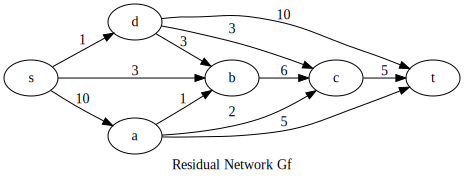

In [5]:
src = Source('''
digraph {

rankdir=LR;
label = "Residual Network Gf";
rank=same;
constraint=true;


s->d[label="1"]
s->a[label="10"]
s->b[label="3"]
a->b[label="1"]

a->c[label="2"]
d->b[label="3"]
b->c[label="6"]
d->c[label="3"]
a->t[label="5"]
c->t[label="5"]
d->t[label="10"]
        
    }
}
}
''')

src

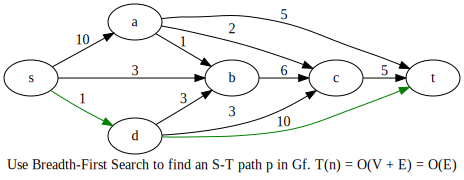

In [6]:
src = Source('''
digraph {

rankdir=LR;
label = "Use Breadth-First Search to find an S-T path p in Gf. T(n) = O(V + E) = O(E)";
rank=same;
constraint=true;

s->a[label="10"]
s->d[label="1" color="green"]
s->b[label="3"]
a->b[label="1"]

a->c[label="2"]
d->b[label="3"]
b->c[label="6"]
d->c[label="3"]
a->t[label="5"]
c->t[label="5"]
d->t[label="10" color="green"]
        
    }

}
''')

src

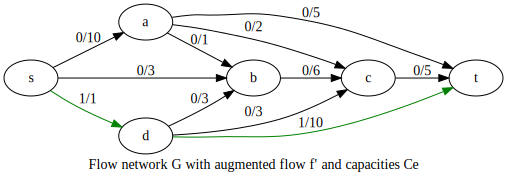

In [7]:
src = Source('''
digraph {

rankdir=LR;
label = "Flow network G with augmented flow f' and capacities Ce";
rank=same;
constraint=true;

s->a[label="0/10"]
s->d[label="1/1" color="green"]
s->b[label="0/3"]

a->b[label="0/1"]
a->c[label="0/2"]
d->b[label="0/3"]
b->c[label="0/6"]
d->c[label="0/3"]
a->t[label="0/5"]
c->t[label="0/5"]
d->t[label="1/10" color="green"]
        
    }
}
''')

src

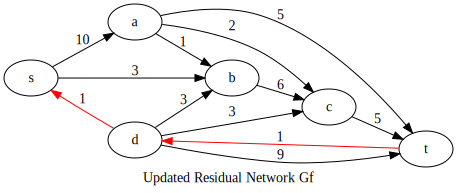

In [8]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated Residual Network Gf";
rank=same;
constraint=true;

s->a[label="10"]
s->b[label="3"]
a->b[label="1"]
s->d[label="1" dir="back" color="red"]

a->c[label="2"]
d->b[label="3"]
b->c[label="6"]
d->c[label="3"]
a->t[label="5"]
c->t[label="5"]
d->t[label="1" dir="back" color="red"]
d->t[label="9"]

        
    }
}
''')

src

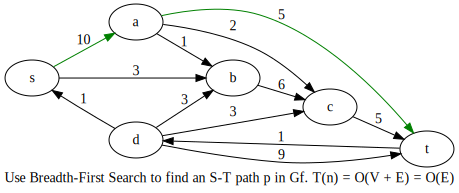

In [9]:
src = Source('''
digraph {

rankdir=LR;
label = "Use Breadth-First Search to find an S-T path p in Gf. T(n) = O(V + E) = O(E)";
rank=same;
constraint=true;

s->a[label="10" color="green"]
s->b[label="3"]
a->b[label="1"]
s->d[label="1" dir="back"]


a->c[label="2"]
d->b[label="3"]
b->c[label="6"]
d->c[label="3"]
a->t[label="5" color="green"]
c->t[label="5"]
d->t[label="1" dir="back"]
d->t[label="9"]
        
    }
}
''')

src

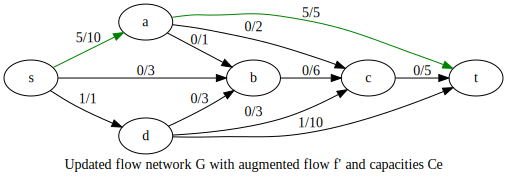

In [10]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated flow network G with augmented flow f' and capacities Ce";
rank=same;
constraint=true;

s->a[label="5/10" color="green"]
s->d[label="1/1"]
s->b[label="0/3"]

a->b[label="0/1"]
a->c[label="0/2"]
d->b[label="0/3"]
b->c[label="0/6"]
d->c[label="0/3"]
a->t[label="5/5" color="green"]
c->t[label="0/5"]
d->t[label="1/10"]
        
    }
}
''')

src

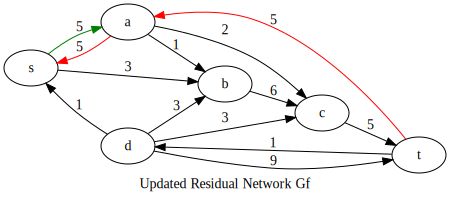

In [11]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated Residual Network Gf";
rank=same;
constraint=true;

s->a[label="5" color="green"]
s->a[label="5" color="red" dir="back"]
s->b[label="3"]
a->b[label="1"]
s->d[label="1" dir="back"]


a->c[label="2"]
d->b[label="3"]
b->c[label="6"]
d->c[label="3"]
a->t[label="5" color="red" dir="back"]
c->t[label="5"]
d->t[label="1" dir="back"]
d->t[label="9"]

        
    }
}
''')

src

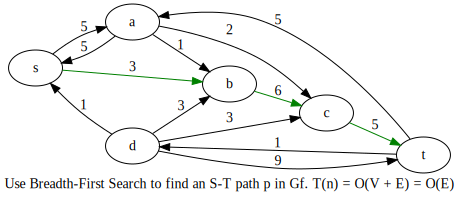

In [12]:
src = Source('''
digraph {

rankdir=LR;
label = "Use Breadth-First Search to find an S-T path p in Gf. T(n) = O(V + E) = O(E)";
rank=same;
constraint=true;

s->a[label="5"]
s->a[label="5" dir="back"]
s->b[label="3" color="green"]
a->b[label="1"]
s->d[label="1" dir="back"]

a->c[label="2"]
d->b[label="3"]
b->c[label="6"color="green"]
d->c[label="3"]
a->t[label="5" dir="back"]
c->t[label="5" color="green"]
d->t[label="1" dir="back"]
d->t[label="9"]
        
    }
}
''')

src

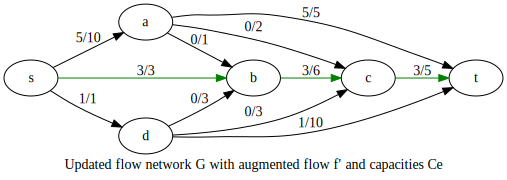

In [13]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated flow network G with augmented flow f' and capacities Ce";
rank=same;
constraint=true;

s->a[label="5/10"]
s->b[label="3/3" color="green"]
s->d[label="1/1"]

a->b[label="0/1"]
a->c[label="0/2"]
d->b[label="0/3"]
b->c[label="3/6" color="green"]
d->c[label="0/3"]
a->t[label="5/5"]
c->t[label="3/5" color="green"]
d->t[label="1/10"]
        
    }
}
''')

src

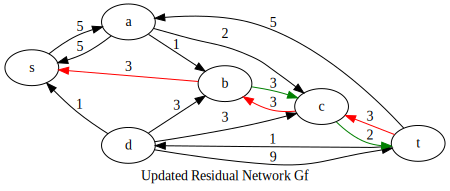

In [14]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated Residual Network Gf";
rank=same;
constraint=true;

s->a[label="5"]
s->a[label="5" dir="back"]
s->b[label="3" dir="back" color="red"]
a->b[label="1"]
s->d[label="1" dir="back"]

a->c[label="2"]
d->b[label="3"]
b->c[label="3" color="green"]
b->c[label="3" color="red" dir="back"]
d->c[label="3"]
a->t[label="5" dir="back"]
c->t[label="2" color="green"]
c->t[label="3" color="red" dir="back"]
d->t[label="1" dir="back"]
d->t[label="9"]

        
    }
}
''')

src

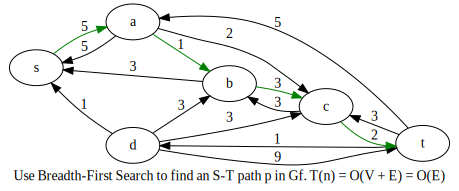

In [15]:
src = Source('''
digraph {

rankdir=LR;
label = "Use Breadth-First Search to find an S-T path p in Gf. T(n) = O(V + E) = O(E)";
rank=same;
constraint=true;

s->a[label="5" color="green"]
s->a[label="5" dir="back"]
s->b[label="3" dir="back"]
a->b[label="1" color="green"]
s->d[label="1" dir="back"]

a->c[label="2"]
d->b[label="3"]
b->c[label="3" color="green"]
b->c[label="3" dir="back"]
d->c[label="3"]
a->t[label="5" dir="back"]
c->t[label="2" color="green"]
c->t[label="3" dir="back"]
d->t[label="1" dir="back"]
d->t[label="9"]
        
    }
}
''')

src

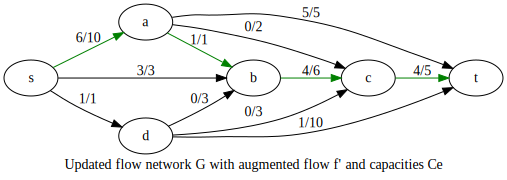

In [16]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated flow network G with augmented flow f' and capacities Ce";
rank=same;
constraint=true;

s->a[label="6/10" color="green"]
s->b[label="3/3"]
s->d[label="1/1"]

a->b[label="1/1" color="green"]
a->c[label="0/2"]
d->b[label="0/3"]
b->c[label="4/6" color="green"]
d->c[label="0/3"]
a->t[label="5/5"]
c->t[label="4/5" color="green"]
d->t[label="1/10"]
        
    }
}
''')

src

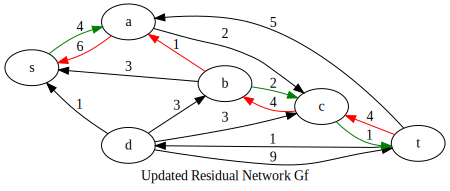

In [17]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated Residual Network Gf";
rank=same;
constraint=true;

s->a[label="4" color="green"]
s->a[label="6" dir="back" color="red"]
s->b[label="3" dir="back"]
a->b[label="1" dir="back" color="red"]
s->d[label="1" dir="back"]

a->c[label="2"]
d->b[label="3"]
b->c[label="2" color="green"]
b->c[label="4" dir="back" color="red"]
d->c[label="3"]
a->t[label="5" dir="back"]
c->t[label="1" color="green"]
c->t[label="4" dir="back" color="red"]
d->t[label="1" dir="back"]
d->t[label="9"]

        
    }
}
''')

src

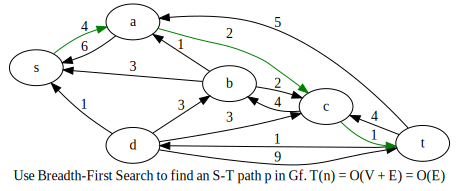

In [18]:
src = Source('''
digraph {

rankdir=LR;
label = "Use Breadth-First Search to find an S-T path p in Gf. T(n) = O(V + E) = O(E)";
rank=same;
constraint=true;

s->a[label="4" color="green"]
s->a[label="6" dir="back"]
s->b[label="3" dir="back"]
a->b[label="1" dir="back"]
s->d[label="1" dir="back"]

a->c[label="2" color="green"]
d->b[label="3"]
b->c[label="2"]
b->c[label="4" dir="back"]
d->c[label="3"]
a->t[label="5" dir="back"]
c->t[label="1" color="green"]
c->t[label="4" dir="back"]
d->t[label="1" dir="back"]
d->t[label="9"]
        
    }
}
}
''')

src

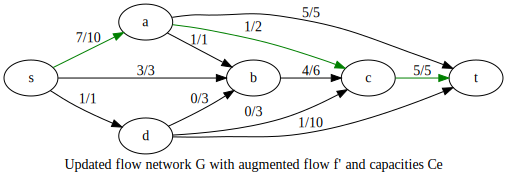

In [19]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated flow network G with augmented flow f' and capacities Ce";
rank=same;
constraint=true;


s->a[label="7/10" color="green"]
s->b[label="3/3"]
s->d[label="1/1"]


a->b[label="1/1"]
a->c[label="1/2" color="green"]
d->b[label="0/3"]
b->c[label="4/6"]
d->c[label="0/3"]
a->t[label="5/5"]
c->t[label="5/5" color="green"]
d->t[label="1/10"]
        
}
}
''')

src

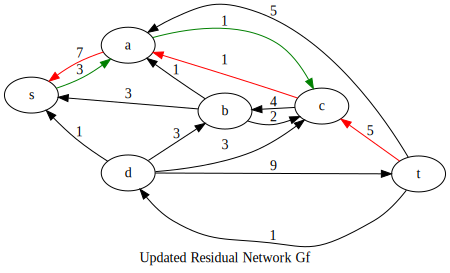

In [20]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated Residual Network Gf";
rank=same;
constraint=true;


s->a[label="3" color="green"]
s->a[label="7" dir="back" color="red"]
s->b[label="3" dir="back"]
a->b[label="1" dir="back"]
s->d[label="1" dir="back"]


a->c[label="1" color="green"]
a->c[label="1" dir="back" color="red"]
d->b[label="3"]
b->c[label="2"]
b->c[label="4" dir="back"]
d->c[label="3"]
a->t[label="5" dir="back"]
c->t[label="5" dir="back" color="red"]
d->t[label="1" dir="back"]
d->t[label="9"]

        
    }
}
''')

src

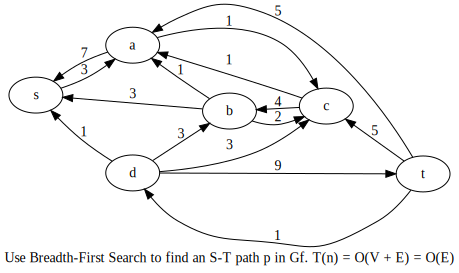

In [21]:
src = Source('''
digraph {

rankdir=LR;
label = "Use Breadth-First Search to find an S-T path p in Gf. T(n) = O(V + E) = O(E)";
rank=same;
constraint=true;


s->a[label="3"]
s->a[label="7" dir="back"]
s->b[label="3" dir="back"]
a->b[label="1" dir="back"]
s->d[label="1" dir="back"]


a->c[label="1"]
a->c[label="1" dir="back"]
d->b[label="3"]
b->c[label="2"]
b->c[label="4" dir="back"]
d->c[label="3"]
a->t[label="5" dir="back"]
c->t[label="5" dir="back"]
d->t[label="1" dir="back"]
d->t[label="9"]   
    }
}
''')

src

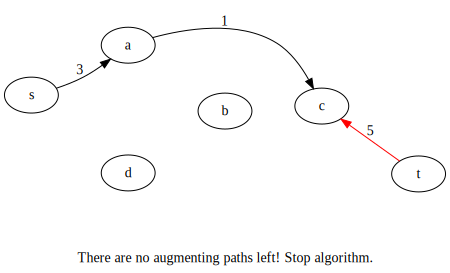

In [22]:
src = Source('''
digraph {
rankdir=LR;
label = "There are no augmenting paths left! Stop algorithm.";
rank=same;
constraint=true;

s->a[label="3"]
s->a[label="7" dir="back" style="invis"]
s->b[label="3" dir="back" style="invis"]
a->b[label="1" dir="back" style="invis"]
s->d[label="1" dir="back" style="invis"]


a->c[label="1"]
a->c[label="1" dir="back" style="invis"]
d->b[label="3" style="invis"]
b->c[label="2" style="invis"]
b->c[label="4" dir="back" style="invis"]
d->c[label="3" style="invis"]
a->t[label="5" dir="back" style="invis"]
c->t[label="5" dir="back" color="red"]
d->t[label="1" dir="back" style="invis"]
d->t[label="9" style="invis"]  
    }
}
''')

src

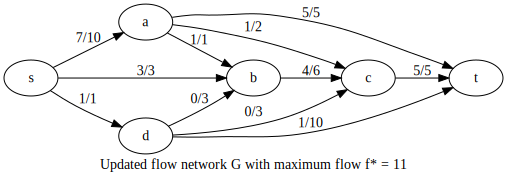

In [23]:
src = Source('''
digraph {

rankdir=LR;
label = "Updated flow network G with maximum flow f* = 11";
rank=same;
constraint=true;

s->a[label="7/10"]
s->b[label="3/3"]
s->d[label="1/1"]


a->b[label="1/1"]
a->c[label="1/2"]
d->b[label="0/3"]
b->c[label="4/6"]
d->c[label="0/3"]
a->t[label="5/5"]
c->t[label="5/5"]
d->t[label="1/10"]
        
    }
}
''')

src

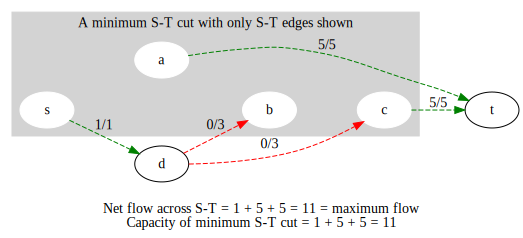

In [24]:
src = Source('''
digraph {
rankdir=LR;
rank=same;
constraint=true;

subgraph cluster0 {
label="A minimum S-T cut with only S-T edges shown"
node [style=filled color=white]
style=filled color=lightgrey
s->a[label="7/10" style=invis]
s->b[label="3/3" style=invis]
a->c[label="1/2" style=invis]
a->b[label="1/1" style=invis]
b->c[label="4/6" style=invis]


}
s->d[label="1/1" style=dashed color="green"]
d->b[label="0/3" style=dashed color="red"]
d->c[label="0/3" style=dashed color="red"]
a->t[label="5/5" style=dashed color="green"]
c->t[label="5/5" style=dashed color="green"]
d->t[label="1/10" style=invis]
label="
Net flow across S-T = 1 + 5 + 5 = 11 = maximum flow
Capacity of minimum S-T cut = 1 + 5 + 5 = 11
" 
    }
}
''')
src.render('Images/hw322.png', view=False)
src